In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

<IPython.core.display.Math object>

we should move down :  -0.0052827132220158585 -0.058232279614628325
[-2.1, -1.7000000000000002]
we should move down :  -0.0007515931191201066 -0.022520811416250043
[-2.1, -2.2]
we should move left :  -0.00011475941845781998 -0.002518361375853836
[-2.6, -2.2]
we should move down :  -9.903001803307352e-06 -0.0008066080992701285
[-2.6, -2.7]
we should move left :  -8.336267237930241e-07 -6.485766583712253e-05
[-3.1, -2.7]
we should move down :  -4.363177759408197e-08 -9.660355509723825e-06
[-3.1, -3.2]
we should move left :  -2.0937077365636304e-09 -5.183202023919012e-07
[-3.6, -3.2]
we should move down :  -6.646608448689672e-11 -4.0002283135225446e-08
[-3.6, -3.7]
we should move left :  -1.851408522884794e-12 -1.3851185460304546e-09
[-4.1, -3.7]
we should move down :  -3.564831897255622e-14 -5.832009479463049e-11
[-4.1, -4.2]


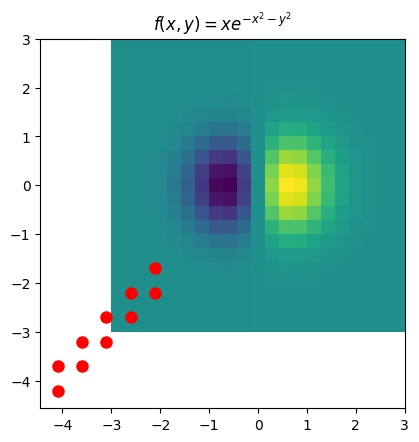

In [35]:
x, y = sym.symbols('x y', real=True)
exp = x*sym.exp( - (x**2 + y**2))

display(Math(f'$\\text {{The Equation is : }} f(x, y) = {sym.latex(exp)}$'))

diff_x = sym.diff(exp, x, 1)
diff_y = sym.diff(exp, y, 1)

# lambdifying the functions to plot
f = sym.lambdify((x, y), exp)
df_x = sym.lambdify((x, y), diff_x)
df_y = sym.lambdify((x, y), diff_y)

xx = np.linspace(-3, 3, 21)
yy = np.linspace(-3, 3, 21)

X,Y = np.meshgrid(xx, yy)

plt.imshow(f(X,Y), origin = 'lower', extent = [xx[0], xx[-1], yy[0], yy[-1]])
plt.title(f'$f(x, y) = {sym.latex(exp)}$')


# Algirithm to find local maximum
random_location = [np.random.choice(xx), np.random.choice(yy)]
grad_x, grad_y = np.gradient(f(X, Y))
step_size = 0.5

for i in range(10):
    gradient = ([df_x(random_location[0], random_location[1]), df_y(random_location[0], random_location[1])])
    # deciding along which axis we get maximum growth
    if gradient[0] > gradient[1]:
        # Now checking which side
        left_gradient = df_x(random_location[0] - step_size, random_location[1])
        right_gradient = df_x(random_location[0] + step_size, random_location[1])
        if left_gradient > right_gradient:
            print('we should move left : ', left_gradient, right_gradient)
            random_location = [random_location[0] - step_size, random_location[1]]
        elif right_gradient > left_gradient:
            print('we should move right : ', right_gradient, left_gradient)
            random_location = [random_location[0] + step_size, random_location[1]]
        else:
            print('check something')
    elif gradient[0] < gradient[1]:
        up_gradient = df_x(random_location[0], random_location[1] + step_size)
        down_gradient = df_x(random_location[0], random_location[1] - step_size)
        if up_gradient > down_gradient:
            print('we should move up : ', up_gradient, down_gradient)
            random_location = [random_location[0], random_location[1] + step_size]
        elif down_gradient > up_gradient:
            print('we should move down : ', down_gradient, up_gradient)
            random_location = [random_location[0], random_location[1] - step_size]
        else:
            print('check something')
    else:
        print('check')
    
    plt.plot(random_location[0], random_location[1], 'o', color='r', markersize = '8')
    print(random_location)

<IPython.core.display.Math object>

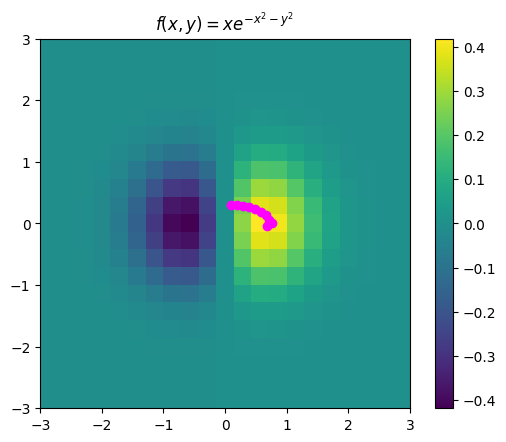

In [48]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Define symbols and function
x, y = sym.symbols('x y', real=True)
exp = x * sym.exp(-(x**2 + y**2))

# Display the equation
from IPython.display import display, Math
display(Math(f'$\\text{{The Equation is : }} f(x, y) = {sym.latex(exp)}$'))

# Derivatives
diff_x = sym.diff(exp, x, 1)
diff_y = sym.diff(exp, y, 1)

# Lambdify functions
f = sym.lambdify((x, y), exp)
df_x = sym.lambdify((x, y), diff_x)
df_y = sym.lambdify((x, y), diff_y)

# Generate meshgrid for plotting
xx = np.linspace(-3, 3, 21)
yy = np.linspace(-3, 3, 21)
X, Y = np.meshgrid(xx, yy)

# Plot the function
plt.imshow(f(X,Y), origin='lower', extent=[xx[0], xx[-1], yy[0], yy[-1]])
plt.colorbar()
plt.title(f'$f(x, y) = {sym.latex(exp)}$')

# Gradient ascent algorithm
random_location = [np.random.choice(xx), np.random.choice(yy)]
learning_rate = 0.1
tolerance = 1e-6

for i in range(10):
    grad = np.array([df_x(random_location[0], random_location[1]), df_y(random_location[0], random_location[1])])
    if np.linalg.norm(grad) < tolerance:
        break
    random_location += learning_rate * grad / np.linalg.norm(grad)
    # random_location += learning_rate * grad
    plt.plot(random_location[0], random_location[1], 'o', color='magenta', markersize=6)

plt.show()

In [ ]:
# see mike's solution, it is a little new for now.
